In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from sklearn.model_selection import train_test_split
import os
from PIL import Image

In [2]:
# Меняем разрешение изображений 
# path_Cats_and_dogs='/Users/Julaysa/Машинное обучение/Сверточные/'
# with os.scandir(path=path_Cats_and_dogs) as it:
#     for entry in it:
#             #print("file:\t" + entry.name) #имя файлов 
#             img_obj = Image.open(path_Cats_and_dogs + entry.name)
#             img_obj = img_obj.resize((150, 200)) # Размер изображений пиксели 
#             img_obj.save(path_Cats_and_dogs + entry.name)

In [3]:
def loadImages(path):
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        loadedImages.append(plt.imread(path + image))
    return np.array(loadedImages)

In [4]:
Cats = loadImages("/Users/Julaysa/Desktop/Cats/")
Dogs = loadImages("/Users/Julaysa/Desktop/Dogs/")

In [5]:
Cats=Cats/255
Dogs=Dogs/255

In [6]:
photo = np.concatenate((Cats, Dogs), axis=0)
label_first = np.concatenate((np.zeros(42), np.ones(42)), axis=0)
label_second = np.concatenate((np.ones(42), np.zeros(42)), axis=0)
label_almost = np.vstack((label_first, label_second))
label = label_almost.swapaxes(1,0)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(photo, label, test_size=0.1, random_state=42)

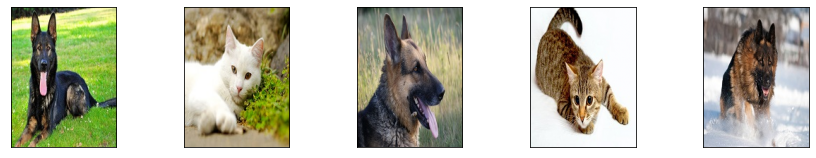

In [8]:
plt.figure(figsize=(15,15))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [9]:
a=[]
for i in range(5):
    if y_train[i][0]>0.5:
        a.append("Dogs")
    else:
        a.append("Cats")
a

['Dogs', 'Cats', 'Dogs', 'Cats', 'Dogs']

In [10]:
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
                         activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(2, activation='softmax'))

In [11]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train,
          epochs=26,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/26
3/3 [==============================] - 13s 3s/step - loss: 1.4300 - accuracy: 0.5867 - val_loss: 1.0539 - val_accuracy: 0.6667
Epoch 2/26
3/3 [==============================] - 10s 3s/step - loss: 1.7353 - accuracy: 0.5333 - val_loss: 0.6907 - val_accuracy: 0.5556
Epoch 3/26
3/3 [==============================] - 10s 3s/step - loss: 0.6768 - accuracy: 0.6667 - val_loss: 0.6933 - val_accuracy: 0.6667
Epoch 4/26
3/3 [==============================] - 10s 3s/step - loss: 0.6785 - accuracy: 0.6800 - val_loss: 0.7052 - val_accuracy: 0.3333
Epoch 5/26
3/3 [==============================] - 9s 3s/step - loss: 0.6686 - accuracy: 0.6667 - val_loss: 0.7307 - val_accuracy: 0.3333
Epoch 6/26
3/3 [==============================] - 9s 3s/step - loss: 0.6379 - accuracy: 0.6800 - val_loss: 0.6397 - val_accuracy: 0.7778
Epoch 7/26
3/3 [==============================] - 10s 3s/step - loss: 0.5984 - accuracy: 0.6933 - val_loss: 0.6129 - val_accuracy: 0.4444
Epoch 8/26
3/3 [====================

KeyboardInterrupt: 

# Прогноз модели

In [13]:
x_new = loadImages("/Users/Julaysa/Desktop/Predict_c_d/")
x_new=x_new/255

In [14]:
pred=model.predict(x_new)

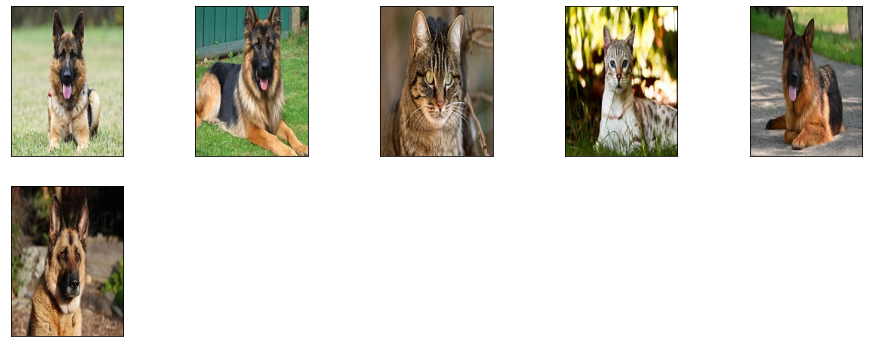

In [15]:
plt.figure(figsize=(16,16))
for i in range(6):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_new[i], cmap=plt.cm.binary)
plt.show()

In [16]:
b=[]
for i in range(6):
    if  pred[i][0]>0.5:
        b.append("Dogs")
    else:
        b.append("Cats")
b

['Dogs', 'Dogs', 'Cats', 'Cats', 'Dogs', 'Dogs']